# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Intensidad-de-la-fuente-de-luz" data-toc-modified-id="Intensidad-de-la-fuente-de-luz-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intensidad de la fuente de luz</a></div><div class="lev2 toc-item"><a href="#Ajuste-a-un-polinomio-para-ver-si-hay-dependencia" data-toc-modified-id="Ajuste-a-un-polinomio-para-ver-si-hay-dependencia-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ajuste a un polinomio para ver si hay dependencia</a></div><div class="lev2 toc-item"><a href="#Analysis-of-results" data-toc-modified-id="Analysis-of-results-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analysis of results</a></div>

# Intensidad de la fuente de luz

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   12/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.

**Procedimiento**:

Se realizan diversas medidas para el mismo valor y se obtiene un valor medio de la intensidad inicial

**Resultado**

Valor medio de la intensidad de luz de la fuente



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat
from polarimeter.utils import plot_experiment_residuals_1D
import pprint


## Ajuste a un polinomio para ver si hay dependencia

To discover a dependency

In [21]:
filename='step0_stability_corto_2018-03-13.mat'
experimental_dict=loadmat(filename)

intervals=experimental_dict['intervals'].flatten()
intensities_0=experimental_dict['intensities_0'].flatten()

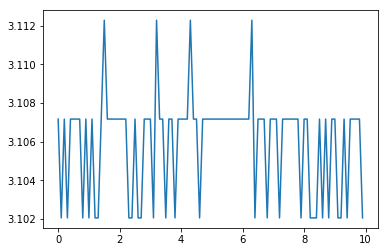

In [20]:
plt.figure()
plt.plot(intervals, intensities_0)

In [22]:
# Fit the first set
fitfunc = lambda p, x: p[0]+p[1]*x + p[2]*x**2 # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function

In [24]:
p0 = [3.0,0,0] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(intervals, intensities_0))
y_fitting=fitfunc(p1, intervals)
residuals=intensities_0-y_fitting

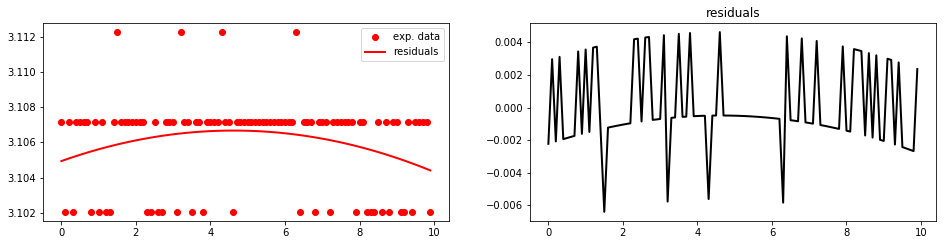

In [26]:
plot_experiment_residuals_1D(intervals, intensities_0, y_fitting)

In [27]:
print(p1)
print(sp.std(residuals))

[  3.10493788e+00   7.51718101e-04  -8.13586224e-05]
0.00251789876931


## Analysis of results

Con los datos proporcionados, se observa que no hay ningún tipo de deriva, los valores que aparecen son puramente aleatorios.